In [10]:
using DelimitedFiles
using Plots; gr();
using Statistics; using StatsBase

In [8]:
function get_means(res::Array{Float64,1}, N=252)
    M = floor(Int, length(res)/N)

    resu = zeros(M)
    
    good = .! isnan.(res)

    for i in 1:M
        istart = (i-1)*N + 1
        iend = i*N
        #println(nanmean(res[istart:iend, si_i]))
        resu[i] = mean(res[istart:iend][good[istart:iend]])
    end
    return resu
end

get_means (generic function with 4 methods)

In [3]:
dat, h = readdlm("../data/base/base_large/results-upper.csv", ',', header=true)

si_i = findfirst(isequal("SiO2"), h[:]);

base_res = get_means(dat[:,si_i]);

In [14]:
dat, _ = readdlm("../data/base/crack_compare_nocrack/results-upper.csv", ',', header=true)
nocrack_res = get_means(dat[:,si_i]);

In [15]:
dat, _ = readdlm("../data/base/crack_compare_noalter/results-upper.csv", ',', header=true)
noalter_res = get_means(dat[:,si_i]);

In [17]:
dat, _ = readdlm("../data/base/crack_compare_high/results-upper.csv", ',', header=true)
highcrack_res = get_means(dat[:,si_i]);

In [18]:
dat, _ = readdlm("../data/base/rejection_bias/results-upper.csv", ',', header=true)
bias_res = get_means(dat[:,si_i]);

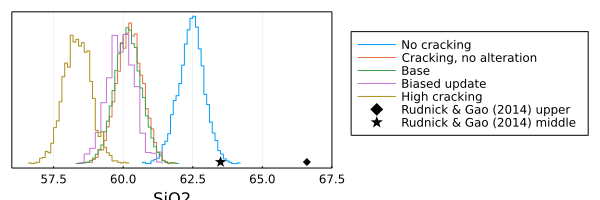

In [47]:

stephist(nocrack_res, label="No cracking", normalize=:pdf)
stephist!(noalter_res, label="Cracking, no alteration", normalize=:pdf)
stephist!(base_res, label="Base", normalize=:pdf)
stephist!(bias_res, label="Biased update", normalize=:pdf)
stephist!(highcrack_res, label="High cracking", normalize=:pdf)

colors = [:blue, :orange, :green]
scatter!([66.6], [1/100], c=:black, label="Rudnick & Gao (2014) upper", shape=:diamond, legend=:outerright)
scatter!([63.5], [1/100], c=:black, label="Rudnick & Gao (2014) middle", shape=:star, markersize=6)

plot!(yticks=false, framestyle=:box, xlabel="SiO2", size=(600, 200), xlims=(56, 67.5), dpi=300)

#savefig("../../thesis/figures/upper_crust_crack_compare.png")